<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
# Importing Modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorboard
import seaborn as sns

In [75]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [76]:
import datetime

In [77]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [78]:
# Loading the data

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PIAIC Deep Learning Assignments/CarPrice_Assignment.csv')

In [21]:
import datetime
# Clear any logs from previous runs
!rm -rf ./logs/

In [79]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [81]:
# Checking The Data For Null Values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

In [82]:
# Checking Some Important Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [83]:
# Droping Unecessary Features

df.drop(["car_ID", "symboling", "CarName"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


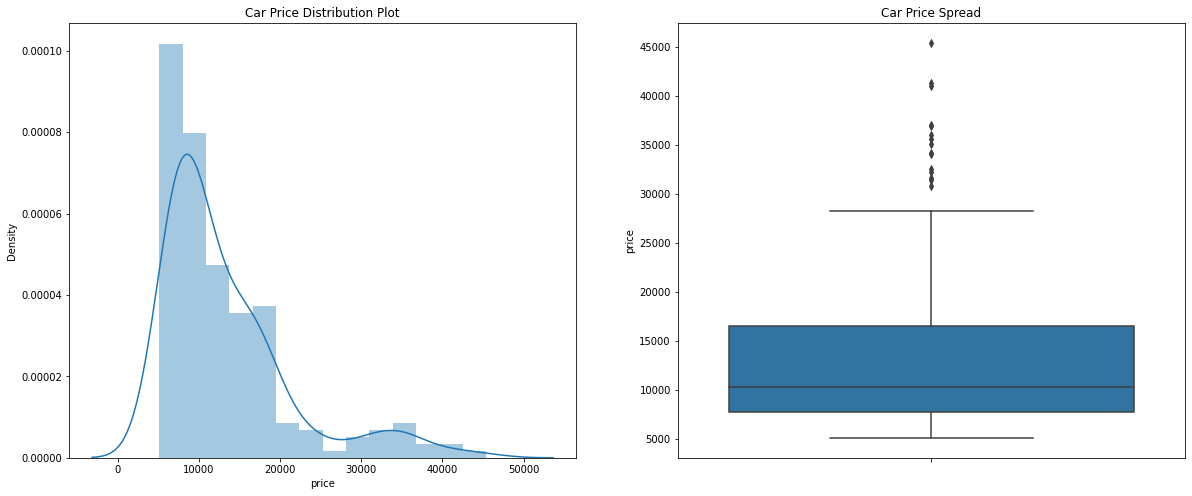

In [84]:
# Visualizing The Data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

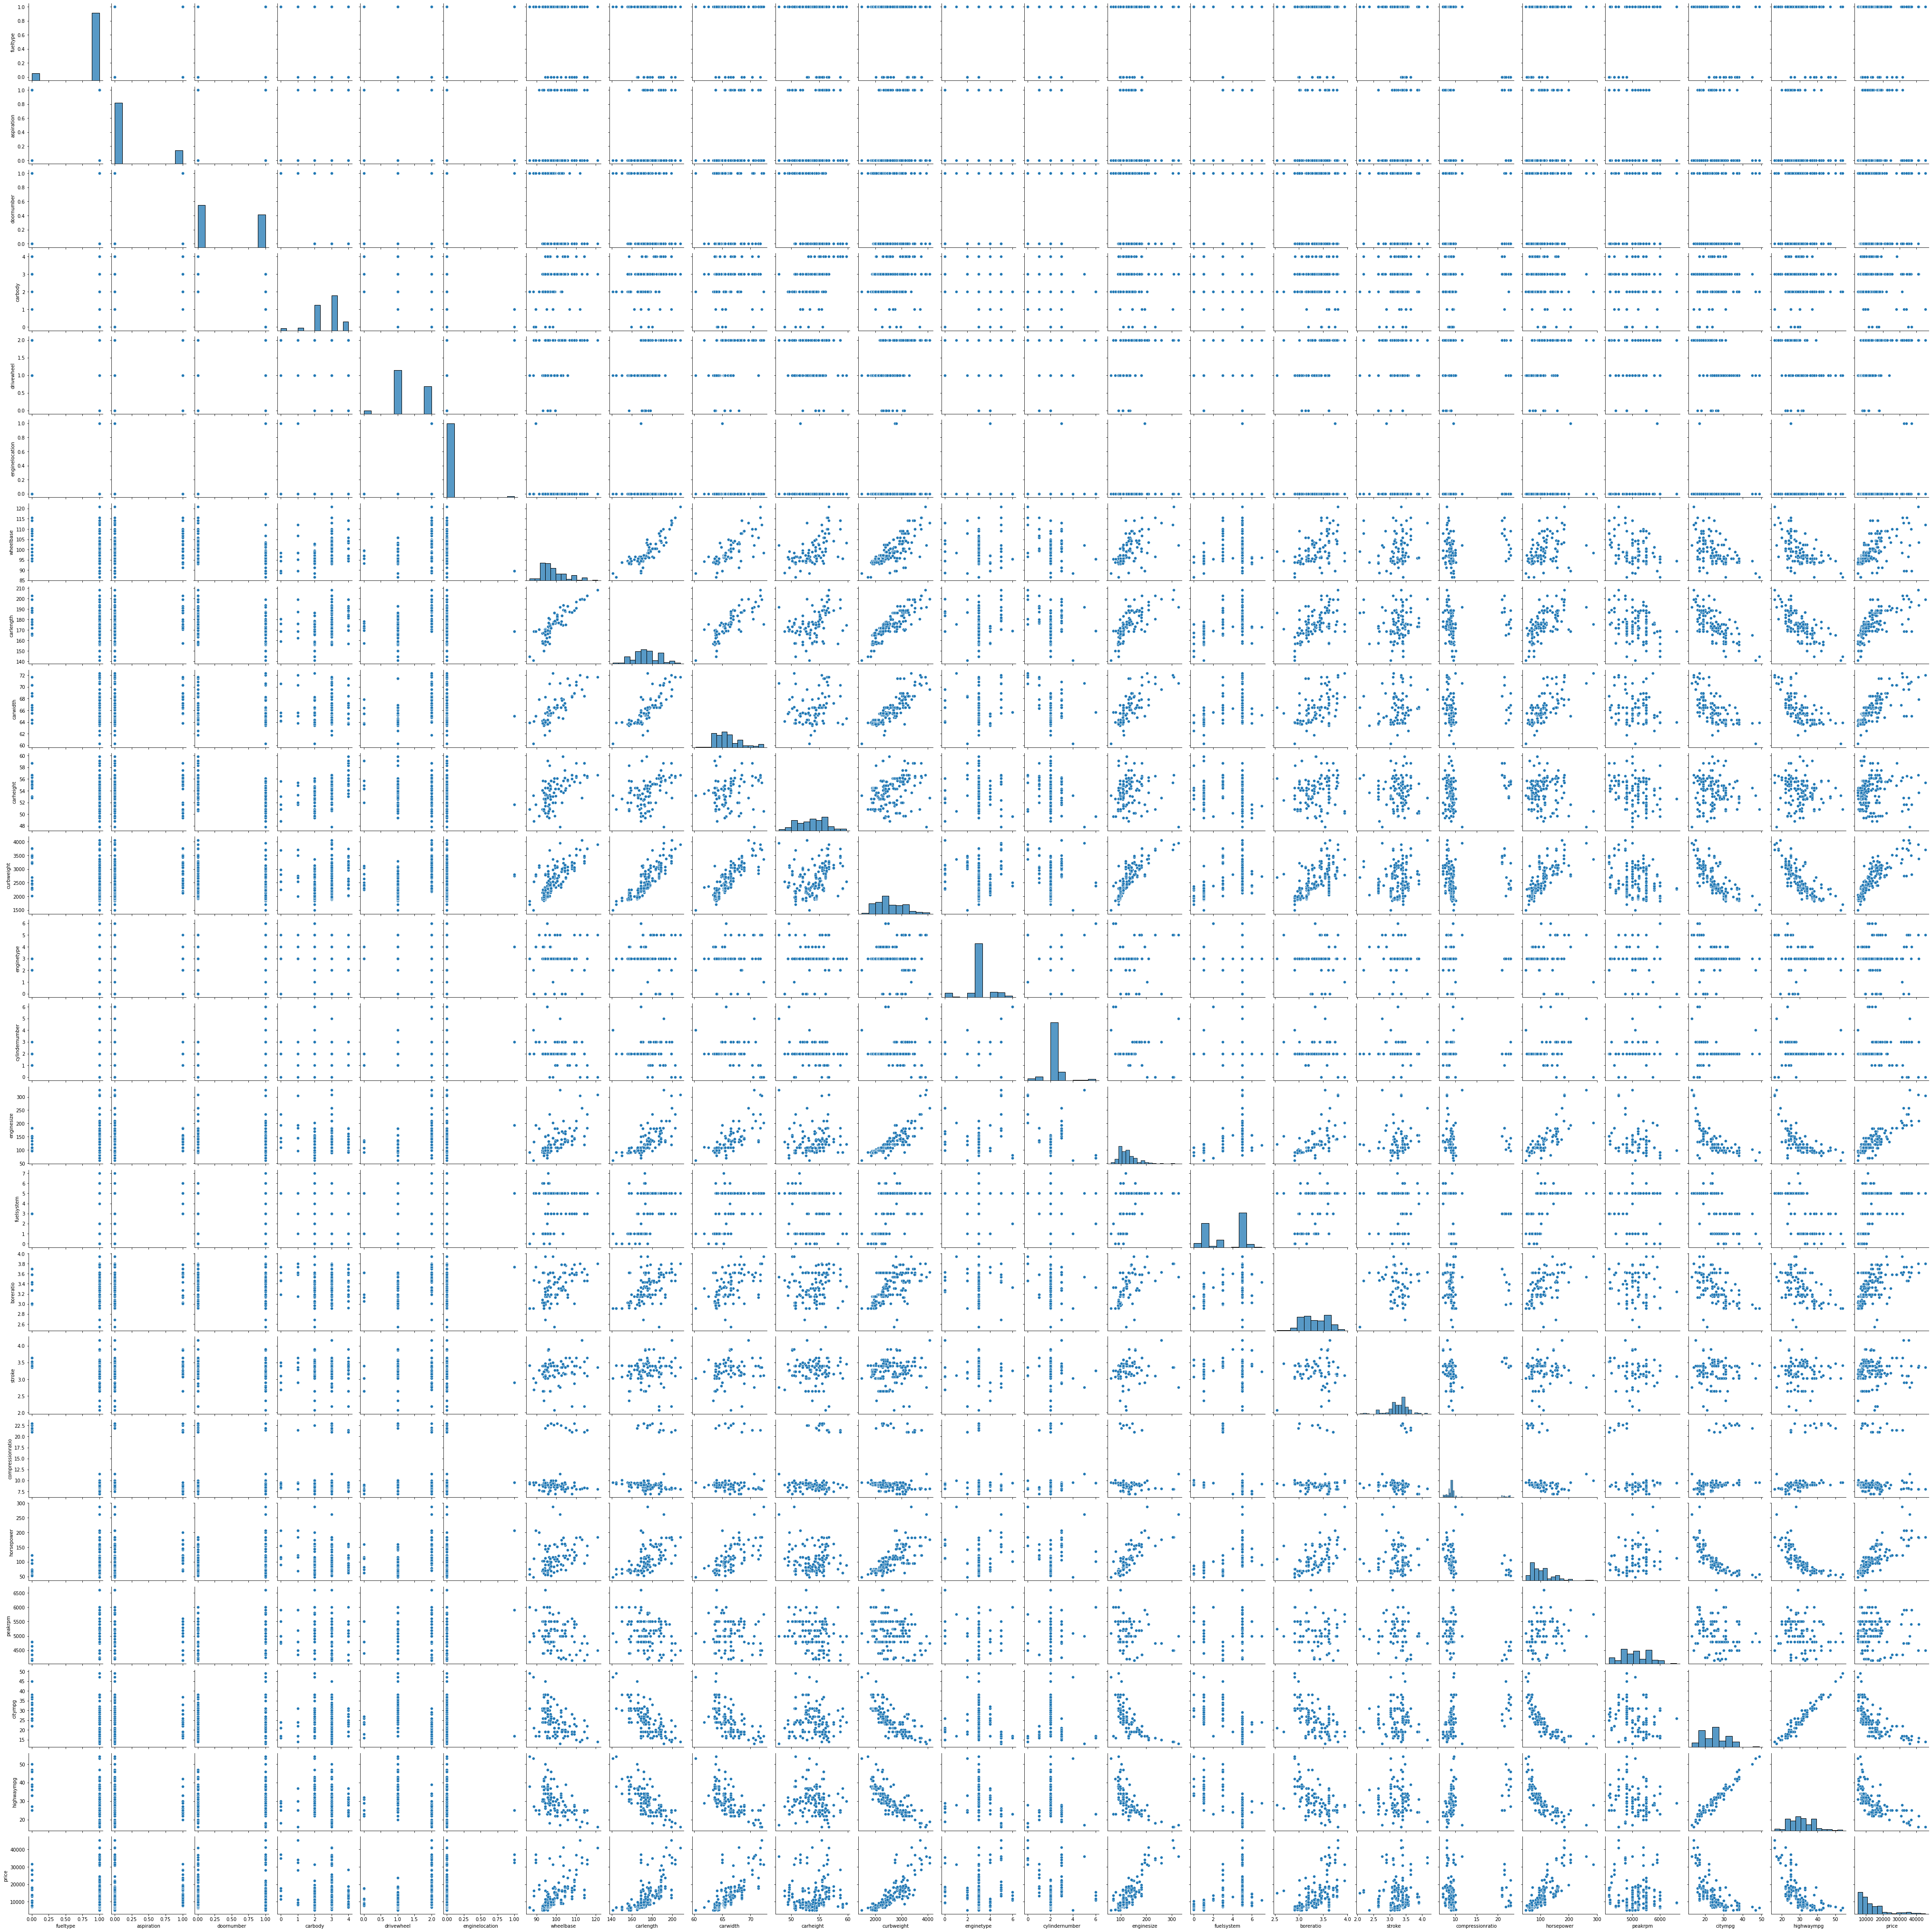

In [ ]:
# Plotting Relations Between Features
sns.pairplot(df)

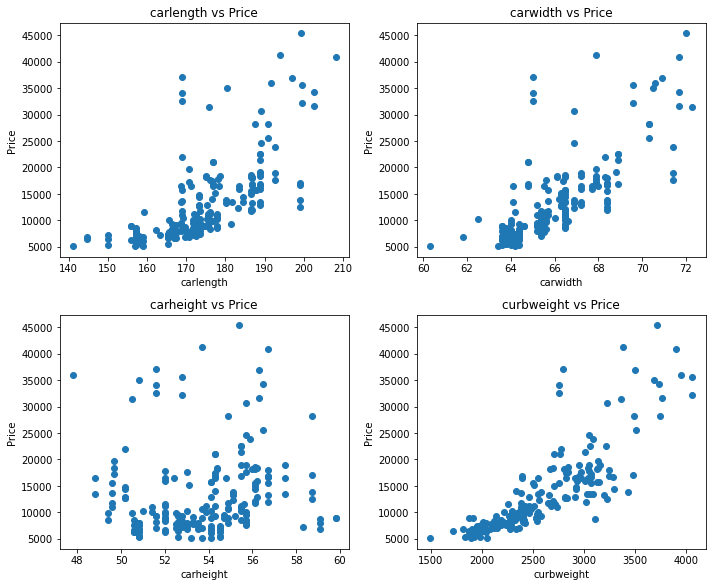

In [28]:
# Plotting Numerical Features
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [85]:
# Converting Alphabetical Features Into Numerical Features
import sklearn
labelencoder = sklearn.preprocessing.LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem'])
df['doornumber'] = labelencoder.fit_transform(df['doornumber'])
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])

In [86]:
# Checking New DataFrame
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
# Shuffling Data
df = df.sample(frac=1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,1,0,1,1,2,1,89.5,168.9,65.0,51.6,2756,4,3,194,5,3.74,2.90,9.5,207,5900,17,25,32528.0
198,1,1,0,3,2,0,104.3,188.8,67.2,56.2,3045,3,2,130,5,3.62,3.15,7.5,162,5100,17,22,18420.0
50,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1890,3,2,91,1,3.03,3.15,9.0,68,5000,30,31,5195.0
71,1,0,0,3,2,0,115.6,202.6,71.7,56.5,3740,5,0,234,5,3.46,3.10,8.3,155,4750,16,18,34184.0
119,1,1,1,2,1,0,93.7,157.3,63.8,50.8,2128,3,2,98,6,3.03,3.39,7.6,102,5500,24,30,7957.0


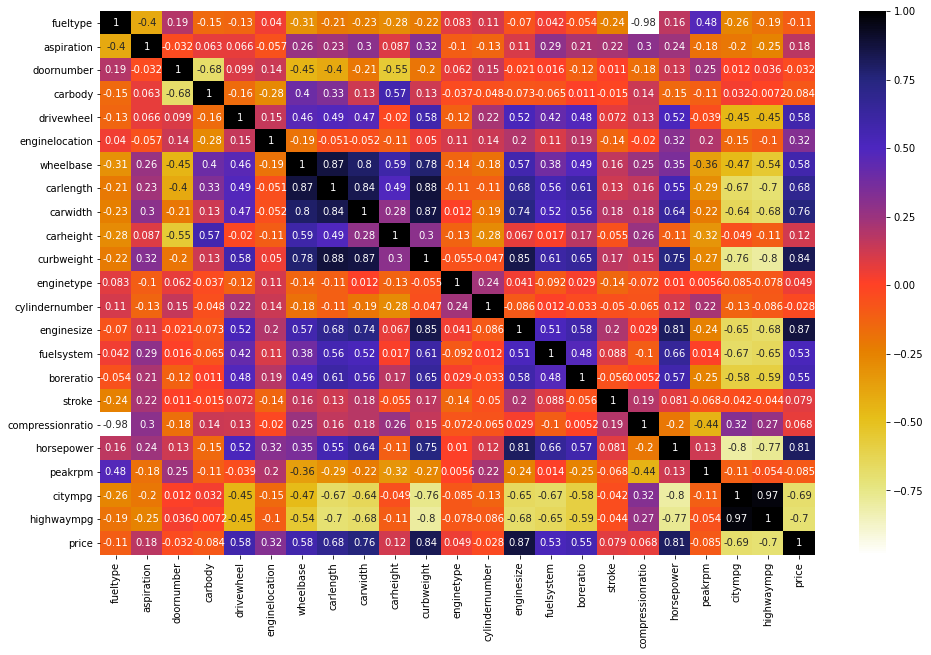

In [89]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot=True)
plt.show()

In [90]:
df.shape

(205, 23)

In [91]:
# Splitting The Dataset Into Training and Testing Data
train_data = df.iloc[:144,:]
train_data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,1,0,1,1,2,1,89.5,168.9,65.0,51.6,2756,4,3,194,5,3.74,2.90,9.5,207,5900,17,25,32528.0
198,1,1,0,3,2,0,104.3,188.8,67.2,56.2,3045,3,2,130,5,3.62,3.15,7.5,162,5100,17,22,18420.0
50,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1890,3,2,91,1,3.03,3.15,9.0,68,5000,30,31,5195.0
71,1,0,0,3,2,0,115.6,202.6,71.7,56.5,3740,5,0,234,5,3.46,3.10,8.3,155,4750,16,18,34184.0
119,1,1,1,2,1,0,93.7,157.3,63.8,50.8,2128,3,2,98,6,3.03,3.39,7.6,102,5500,24,30,7957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
39,1,0,0,3,1,0,96.5,175.4,65.2,54.1,2304,3,2,110,0,3.15,3.58,9.0,86,5800,27,33,8845.0
204,1,1,0,3,2,0,109.1,188.8,68.9,55.5,3062,3,2,141,5,3.78,3.15,9.5,114,5400,19,25,22625.0
95,1,0,1,2,1,0,94.5,165.6,63.8,53.3,2028,3,2,97,1,3.15,3.29,9.4,69,5200,31,37,7799.0


In [92]:
test_data = df.iloc[145:,:]
test_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
86,1,0,0,3,1,0,96.3,172.4,65.4,51.6,2405,3,2,122,1,3.35,3.460,8.5,88,5000,25,32,8189.0
120,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,3,2,90,1,2.97,3.230,9.4,68,5500,31,38,6229.0
137,1,1,0,3,1,0,99.1,186.6,66.5,56.1,2847,0,2,121,5,3.54,3.070,9.0,160,5500,19,26,18620.0
56,1,0,1,2,2,0,95.3,169.0,65.7,49.6,2380,6,6,70,2,3.33,3.255,9.4,101,6000,17,23,11845.0
18,1,0,1,2,1,0,88.4,141.1,60.3,53.2,1488,2,4,61,1,2.91,3.030,9.5,48,5100,47,53,5151.0


In [93]:
# Separating Labels From Train And Test Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('price')
test_labels = test_data.pop('price')

In [94]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fueltype,144.0,0.923611,0.266546,0.00,1.00,1.00,1.0000,1.00
aspiration,144.0,0.180556,0.385992,0.00,0.00,0.00,0.0000,1.00
doornumber,144.0,0.423611,0.495855,0.00,0.00,0.00,1.0000,1.00
carbody,144.0,2.645833,0.864763,0.00,2.00,3.00,3.0000,4.00
drivewheel,144.0,1.319444,0.562869,0.00,1.00,1.00,2.0000,2.00
enginelocation,144.0,0.020833,0.143325,0.00,0.00,0.00,0.0000,1.00
wheelbase,144.0,98.740278,6.154586,86.60,94.50,96.90,101.2000,120.90
carlength,144.0,174.294444,12.266064,144.60,167.30,173.20,181.5500,208.10
carwidth,144.0,65.969444,2.128799,61.80,64.20,65.50,66.9000,72.30
carheight,144.0,53.653472,2.441309,48.80,51.60,53.80,55.5000,59.80


In [95]:
# Noramalizing The Data 

# Finding Mean 
train_mean = np.mean(train_data, axis=0)
# Finding Standard Deviation
train_std = np.std(train_data, axis=0)
# Formula Used : Data - Mean / Standard Deviation
train_data = (train_data-train_mean) / train_std
test_data = (test_data-train_mean) / train_std

In [96]:
# Checking Normalize Test Data
train_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
126,0.287588,-0.469403,1.166471,-1.909862,1.213303,6.855655,-1.506605,-0.441321,-0.456984,-0.844072,0.351075,0.963132,1.270042,1.563619,0.814715,1.467764,-1.220674,-0.091341,2.552072,1.656021,-1.254468,-0.807870
198,0.287588,2.130367,-0.857286,0.410983,1.213303,-0.145865,0.906499,1.186704,0.580069,1.046740,0.911201,-0.064209,-0.094779,0.032887,0.814715,1.031974,-0.399439,-0.654524,1.417117,-0.069656,-1.254468,-1.261117
50,0.287588,-0.469403,1.166471,-0.749440,-0.569509,-0.145865,-0.919634,-1.243062,-0.834095,0.183544,-1.327366,-0.064209,-0.094779,-0.899903,-1.132487,-1.110659,-0.399439,-0.232137,-0.953677,-0.285366,0.836685,0.098623
71,0.287588,-0.469403,-0.857286,0.410983,1.213303,-0.145865,2.748937,2.315686,2.701315,1.170054,2.258217,1.990472,-2.824423,2.520326,0.814715,0.450921,-0.563686,-0.429251,1.240569,-0.824640,-1.415326,-1.865446
119,0.287588,2.130367,1.166471,-0.749440,-0.569509,-0.145865,-0.821805,-1.390321,-1.022650,-1.172909,-0.866085,-0.064209,-0.094779,-0.732479,1.301515,-1.110659,0.388946,-0.626365,-0.096156,0.793182,-0.128463,-0.052459


In [97]:
test_data.tail()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
76,0.287588,-0.469403,1.166471,-0.749440,-0.569509,-0.145865,-0.821805,-1.390321,-0.739817,-1.172909,-1.273097,-0.064209,-0.094779,-0.875985,-1.132487,-1.328554,-0.136644,-0.119500,-0.953677,0.793182,1.962690,1.609446
92,0.287588,-0.469403,-0.857286,0.410983,-0.569509,-0.145865,-0.691367,-0.735838,-1.022650,0.347962,-1.234334,-0.064209,-0.094779,-0.756397,-1.132487,-0.674869,0.060452,-0.119500,-0.928456,0.146053,0.997542,1.005117
53,0.287588,-0.469403,-0.857286,0.410983,-0.569509,-0.145865,-0.919634,-0.613123,-0.834095,0.183544,-1.220767,-0.064209,-0.094779,-0.899903,-1.132487,-1.110659,-0.399439,-0.232137,-0.953677,-0.285366,0.997542,1.156199
165,0.287588,-0.469403,1.166471,0.410983,1.213303,-0.145865,-0.691367,-0.457683,-0.928372,-0.433026,-0.600558,-3.146230,-0.094779,-0.732479,0.814715,-0.348027,-0.629385,-0.119500,0.156056,3.165988,0.193253,-0.203541
140,0.287588,-0.469403,1.166471,-0.749440,-2.352321,-0.145865,-0.887024,-1.390321,-1.022650,0.841217,-0.649012,0.963132,-0.094779,-0.493302,-1.132487,1.031974,-2.074757,-0.316614,-0.827571,-1.579624,0.193253,0.098623


In [123]:
# Making Model

model = tf.keras.models.Sequential()
model.add(Dense(12, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                276       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 7         
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Training Model on Train Data
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [125]:
# Feeding History In DataFrame
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,267771584.0,267771584.0,13801.702148,215161504.0,215161504.0,13213.214844,95
96,267771008.0,267771008.0,13801.681641,215161008.0,215161008.0,13213.194336,96
97,267770464.0,267770464.0,13801.661133,215160448.0,215160448.0,13213.173828,97
98,267769920.0,267769920.0,13801.641602,215159936.0,215159936.0,13213.155273,98
99,267769360.0,267769360.0,13801.623047,215159424.0,215159424.0,13213.133789,99


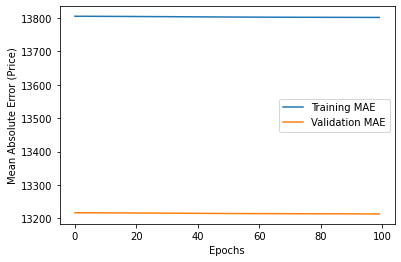

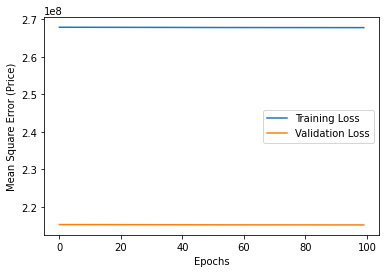

In [126]:
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [127]:
# Making Predictions On Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [128]:
test_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 196502784.0000 - mse: 196502784.0000 - mae: 12215.7412


In [129]:
print(f"Loss: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Loss: 196502784.0
Mean Absolute Error: 196502784.0


In [130]:
print(predictions.shape)
print(test_labels.shape)

(60,)
(60,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

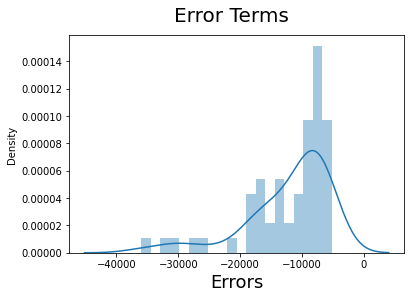

In [131]:
fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Making Second Model For Tuning

In [147]:
from tensorflow.keras.models import Sequential
model2 = Sequential()
# model2.add(Dense(10, activation='relu', input_shape = (22,)))
# model2.add(Dense(8, activation='relu'))
# model2.add(Dense(6, activation='relu'))
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                1472      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [148]:
history_1 = model2.fit(train_data, train_labels, epochs=1000, verbose = 0, validation_split=0.2)

In [149]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
995,1500809.375,1500809.375,897.887512,8168728.5,8168728.5,2141.057861,995
996,1483306.000,1483306.000,894.714539,8211729.5,8211729.5,2143.042725,996
997,1508101.125,1508101.125,912.156677,8239083.0,8239083.0,2142.268799,997
998,1477976.375,1477976.375,889.685059,8198313.0,8198313.0,2137.777100,998
999,1496586.625,1496586.625,898.243408,8317216.0,8317216.0,2165.692383,999


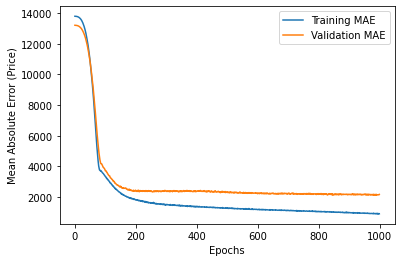

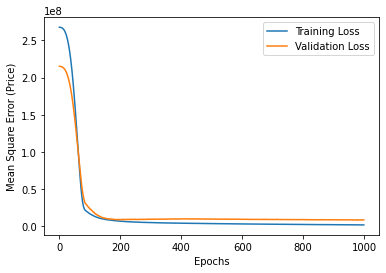

In [150]:
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

In [151]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()
predictions1.shape

(60,)

In [152]:
test_labels.shape

(60,)

In [157]:
test1_score = model2.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 15864780.0000 - mse: 15864780.0000 - mae: 2596.3650


In [154]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 15864780.0
Mean Absolute Error: 2596.364990234375


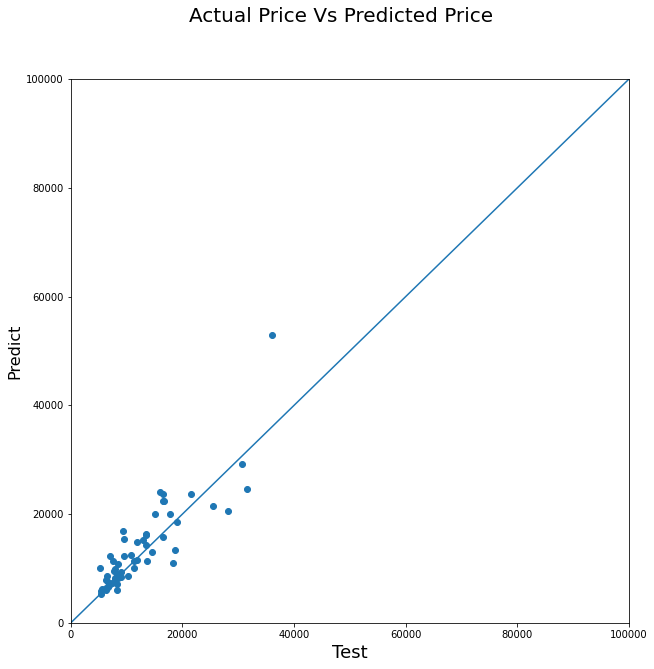

In [165]:
# Making Price Predictions On Test Data

fig = plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions1)
fig.suptitle('Actual Price Vs Predicted Price', fontsize=20)              # Plot heading 
plt.xlabel('Test', fontsize=18)                          # X-label
plt.ylabel('Predict', fontsize=16)   
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

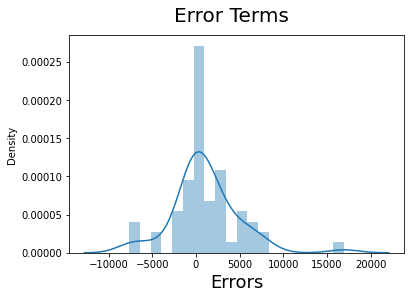

In [166]:
fig = plt.figure()
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Final Loss: 15864780.0 <br>
Final Mean Absolute Error: 2596.364

In [168]:
# Saving Appropriate Model
model2.save('CarPricePredictionModel.h5')

In [ ]:
# Saving Model In CSV File
df.to_csv('CarPricePredictionModel.csv', index=False)
print("Your File Was Saved Successfully!")

Your File Was Saved Successfully!
